TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [24]:
train_df = pd.read_csv('/home/rodion/labs/da_course/lab2/data/contest_train.csv')
train_df.drop('ID',axis=1,inplace=True)

print('train_df_shape = ',train_df.shape)
print(train_df.columns)

train_df_shape =  (9999, 102)
Index(['TARGET', 'FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3',
       'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_7', 'FEATURE_8',
       ...
       'FEATURE_91', 'FEATURE_92', 'FEATURE_93', 'FEATURE_94', 'FEATURE_95',
       'FEATURE_96', 'FEATURE_97', 'FEATURE_98', 'FEATURE_99', 'FEATURE_100'],
      dtype='object', length=102)


In [25]:
train_df.head(5)

,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,FEATURE_50,FEATURE_51,FEATURE_52,FEATURE_53,FEATURE_54,FEATURE_55,FEATURE_56,FEATURE_57,FEATURE_58,FEATURE_59,FEATURE_60,FEATURE_61,FEATURE_62,FEATURE_63,FEATURE_64,FEATURE_65,FEATURE_66,FEATURE_67,FEATURE_68,FEATURE_69,FEATURE_70,FEATURE_71,FEATURE_72,FEATURE_73,FEATURE_74,FEATURE_75,FEATURE_76,FEATURE_77,FEATURE_78,FEATURE_79,FEATURE_80,FEATURE_81,FEATURE_82,FEATURE_83,FEATURE_84,FEATURE_85,FEATURE_86,FEATURE_87,FEATURE_88,FEATURE_89,FEATURE_90,FEATURE_91,FEATURE_92,FEATURE_93,FEATURE_94,FEATURE_95,FEATURE_96,FEATURE_97,FEATURE_98,FEATURE_99,FEATURE_100
0,1,2,2,0,0,0,0,0,-114.527812,-17.218055,0,0,0,25.257841,1,1,0,0,0,0,0,0.0,2.492541,0.0,3.770712,-2.165145,0.0,-11.508692,0,0,0,0,0,0,0.709990,-166.128241,16.497987,-109.953267,-10.257451,-35.403966,0,0,0,0,0,0,10.689090,0.868280,79.319996,57.563879,5.147706,219.773565,13.723706,79.067758,12.855037,-22.713935,-13.550348,-31.575653,64.609721,111.118840,104.421868,93.389622,33.815437,27.072520,60.966939,279.433996,242.857149,342.448089,180.439710,157.383234,12,0,436.976097,393.719775,438.089670,5,0,1.225806,20.945718,100.423397,-14.418549,11.459275,49.192649,58.212399,103.175453,30.562678,0.022050,12.683430,1.009054,-1.828095,0.040347,-11.521372,30.630117,-3.772832,-13.410730,17.525901,-0.033100,0.151530,8.523431,41.071996,0.367572,-0.267070
1,0,1,1,0,0,1,0,0,329.828334,NaN,3,2,1,767.317882,30,11,1,0,0,1,0,0.0,-1.779101,0.0,-27.718626,-2.046630,0.0,-48.533875,0,0,0,0,0,0,4198.421679,6935.032043,3326.119168,4750.740829,8171.976929,6420.860803,0,0,0,0,0,0,417.477824,235.004035,79.224153,204.493251,13.989721,182.309852,4584.816142,7301.022402,3535.486450,4902.755382,8367.397340,6491.857508,175.961799,181.383436,217.739736,772.333166,204.650235,339.126275,694.884731,324.883021,262.515475,1349.383575,405.153594,355.827328,27,8,0.887098,10.825665,8.155251,3,0,0.225806,78.641281,1640.209058,4851.609100,68.151294,219.396399,68.186029,192.213062,472.596936,10.765332,4.770865,7.492115,20.831123,6.573114,571.197374,275.973903,347.281462,898.299679,355.943479,5.423644,9.940164,11.489917,20.453602,2.326564,16.725288
2,1,0,0,0,0,0,0,0,17.427338,-6.680747,0,0,0,1453.022898,4,5,0,0,0,0,0,0.0,-2.042108,0.0,-0.090641,-1.499671,0.0,-6.227192,0,0,0,0,0,0,-89.245457,9.436363,0.792981,61.085481,4.367151,13.729554,0,0,0,0,0,0,-50.758670,-21.777548,6.803282,11.698560,5.728337,-52.497390,70.855730,-38.944108,-91.577786,-11.509675,-0.376105,-72.597362,93.754651,234.771014,356.806197,339.819588,133.467187,216.373796,162.968923,437.515350,666.168439,602.152267,262.028303,443.193222,31,0,113.402477,22.667529,123.970869,0,0,0.000000,-2.777358,-1.932071,-24.946938,43.488753,130.933519,78.335263,103.021045,306.583181,-0.196349,0.272040,-1.094674,0.696843,0.042165,-25.386935,23.441701,-82.335437,14.623177,11.278962,0.103039,1.344308,29.859272,17.370951,0.993724,1.205868
3,0,1,1,0,0,0,0,0,23.621397,36.659534,0,0,0,31.190091,0,0,0,0,0,0,0,0.0,2.717799,0.0,4.728385,1.393742,0.0,97.362996,0,0,0,0,0,0,31.692737,-13.471019,-28.444859,18.306662,11.252959,89.731093,0,0,0,0,0,0,-9.829404,-28.979248,32.162767,3.138969,-41.051867,28.577461,51.634270,-21.948871,-13.797301,15.771812,-35.155337,-28.161010,115.511049,188.461560,95.479312,36.627330,58.509152,177.564576,27.215813,278.376764,45.444660,-37.756518,79.775251,224.796294,23,0,180.837556,115.084361,116.992771,3,0,0.387097,0.372901,-2.524179,-74.530303,7.314030,13.457612,78.412502,30.254332,109.762482,0.020304,0.163251,-0.522076,-

Delete columns with nan percent > 8

In [26]:
# fill other data with knn imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3)
train_df.iloc[:,1:] = imputer.fit_transform(train_df.iloc[:,1:])


In [27]:
robust_scaler = RobustScaler()
train_df.iloc[:,1:] = robust_scaler.fit_transform(train_df.iloc[:,1:])

df_class_0 = train_df[train_df["TARGET"] == 0]
df_class_1 = train_df[train_df["TARGET"] == 1]
df_class_2 = train_df[train_df["TARGET"] == 2]

df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
df_class_2_over = df_class_2.sample(len(df_class_0), replace=True)

train_df = pd.concat([df_class_0, df_class_1_over, df_class_2_over], axis=0)
train_df = train_df.sample(n = len(train_df))

In [28]:
Y_train=train_df.iloc[:,0]
X_train=train_df.iloc[:,1:]

In [29]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)

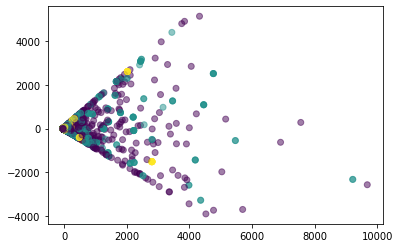

In [30]:
plt.scatter(X_train_reduced[:,0], X_train_reduced[:,1], alpha=0.5, c = Y_train, cmap='viridis')

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
X_train_tsne = tsne.fit_transform(X_train)

/home/rodion/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/rodion/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 21279 samples in 0.002s...
[t-SNE] Computed neighbors for 21279 samples in 9.342s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21279
[t-SNE] Computed conditional probabilities for sample 2000 / 21279
[t-SNE] Computed conditional probabilities for sample 3000 / 21279
[t-SNE] Computed conditional probabilities for sample 4000 / 21279
[t-SNE] Computed conditional probabilities for sample 5000 / 21279
[t-SNE] Computed conditional probabilities for sample 6000 / 21279
[t-SNE] Computed conditional probabilities for sample 7000 / 21279
[t-SNE] Computed conditional probabilities for sample 8000 / 21279
[t-SNE] Computed conditional probabilities for sample 9000 / 21279
[t-SNE] Computed conditional probabilities for sample 10000 / 21279
[t-SNE] Computed conditional probabilities for sample 11000 / 21279
[t-SNE] Computed conditional probabilities for sample 12000 / 21279
[t-SNE] Computed conditional probabilities for sam

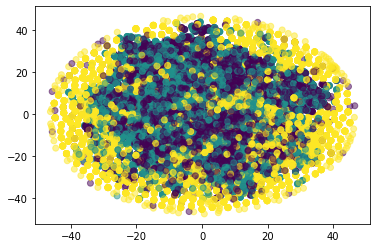

In [37]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], alpha=0.5, c = Y_train, cmap='viridis')

In [38]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
X_train_tsne = tsne.fit_transform(X_train)

/home/rodion/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/rodion/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21279 samples in 0.002s...
[t-SNE] Computed neighbors for 21279 samples in 9.802s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21279
[t-SNE] Computed conditional probabilities for sample 2000 / 21279
[t-SNE] Computed conditional probabilities for sample 3000 / 21279
[t-SNE] Computed conditional probabilities for sample 4000 / 21279
[t-SNE] Computed conditional probabilities for sample 5000 / 21279
[t-SNE] Computed conditional probabilities for sample 6000 / 21279
[t-SNE] Computed conditional probabilities for sample 7000 / 21279
[t-SNE] Computed conditional probabilities for sample 8000 / 21279
[t-SNE] Computed conditional probabilities for sample 9000 / 21279
[t-SNE] Computed conditional probabilities for sample 10000 / 21279
[t-SNE] Computed conditional probabilities for sample 11000 / 21279
[t-SNE] Computed conditional probabilities for sample 12000 / 21279
[t-SNE] Computed conditional probabilities for sa

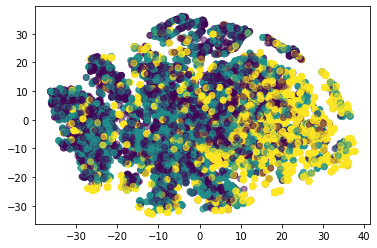

In [39]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], alpha=0.5, c = Y_train, cmap='viridis')

TASK 2

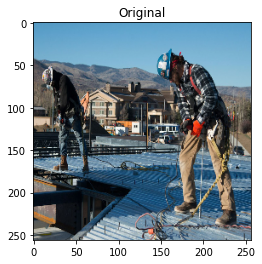

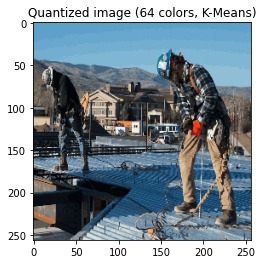

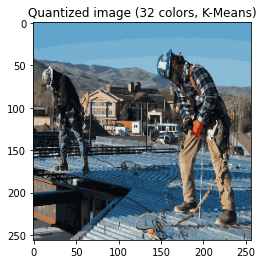

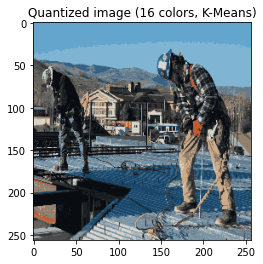

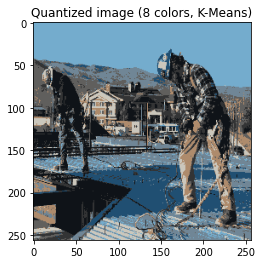

In [5]:
from sklearn.cluster import KMeans
import cv2
from sklearn.utils import shuffle

image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
image = cv2.resize(image,(256,256))

plt.title(f"Original")
plt.imshow(image)
plt.show()

w, h, d  = image.shape
image_array = np.reshape(image, (w * h, d))
image_array_sample = shuffle(image_array, random_state=42, n_samples=20000)

colors = [64,32,16,8]

def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

for color_n in colors:
    kmeans = KMeans(n_clusters=color_n, random_state=42).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.title(f"Quantized image ({color_n} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.show()

TASK 2.2

/tmp/ipykernel_25749/1732717428.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  x1 = np.random.multivariate_normal([5, 5], cov = [[1, -5], [20, 100]], size = 100)
/tmp/ipykernel_25749/1732717428.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  x2 = np.random.multivariate_normal([0, 10], cov = [[0, 1], [-20, 0]], size = 100)


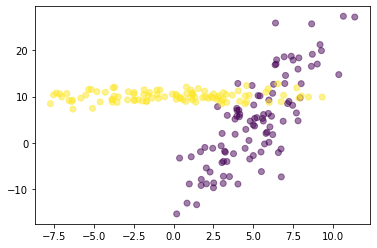

In [39]:
x1 = np.random.multivariate_normal([5, 5], cov = [[1, -5], [20, 100]], size = 100)
y1 = np.zeros(x1.shape[0])
x2 = np.random.multivariate_normal([0, 10], cov = [[0, 1], [-20, 0]], size = 100)
y2 = np.ones(x2.shape[0])
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
plt.scatter(x[:,0], x[:,1], alpha=0.5, c = y, cmap='viridis')

In [59]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

gm = GaussianMixture(n_components=2, random_state=42, covariance_type= 'full').fit(x)
predict_full_cov = gm.predict(x)

gm = GaussianMixture(n_components=2, random_state=42, covariance_type= 'tied').fit(x)
predict_tied_cov = gm.predict(x)

means =  [[ 2.27527157 10.50287246]
 [ 3.57697428 -3.89625384]]
cov matrices =  [[17.98118911  5.54704597]
 [ 5.54704597 18.92108956]]
f1_score =  0.075


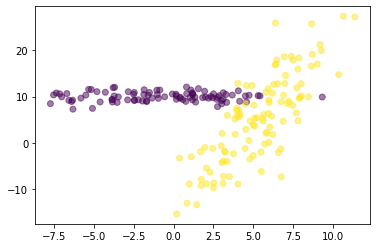

means =  [[ 2.27527157 10.50287246]
 [ 3.57697428 -3.89625384]]
cov matrices =  [[17.98118911  5.54704597]
 [ 5.54704597 18.92108956]]
f1_score =  0.29


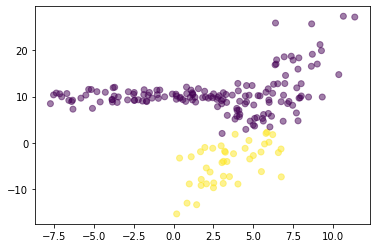

In [60]:
print('means = ',gm.means_)
print('cov matrices = ',gm.covariances_)
plt.scatter(x[:,0], x[:,1], alpha=0.5, c = predict_full_cov, cmap='viridis')
print('f1_score = ',f1_score(y, predict_full_cov, average='micro'))
plt.show()

print('means = ',gm.means_)
print('cov matrices = ',gm.covariances_)
plt.scatter(x[:,0], x[:,1], alpha=0.5, c = predict_tied_cov, cmap='viridis')
print('f1_score = ',f1_score(y, predict_tied_cov, average='micro'))
plt.show()